# 

# Cross Validation 
cross validation is a method that used to evaluate ML model and optimize it.

In [1]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import dataset
df = pd.read_csv("C:\\Users\\vegat\\Porto Data\\titanic\\50_Startups.csv")

## Data Profiling
It's like we check our data to find out what are the advantages and disadvantages of our data.<br>
In the data profiling stage we do several things, such as:

* To check our data at an early stage

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


* Try to identify what is in our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


* To check what is missing from our data

In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

* To check What is strange about our data

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data cleansing
After knowing what are the shortcomings or what needs to be corrected in our data, we do data cleaning so that our model can process it later.
<br>
In the data cleansing stage we do several things, such as:
- Change Data Type
- Handling Missing Value
- Change Column Name
- Etc.

In [7]:
# the data is clean

## Exploratory Data Analysis
After doing data cleansing, we will explore our data so that we know better what happens to our data.<br>
In the exploratory data analysis stage we do several things, such as:

* which state with most startup?

<AxesSubplot:xlabel='count', ylabel='State'>

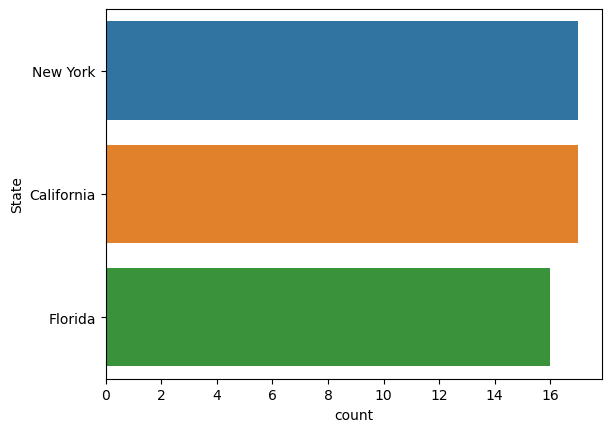

In [8]:
sns.countplot(y="State", data=df)

* which state have the most profit?

<AxesSubplot:xlabel='State', ylabel='Profit'>

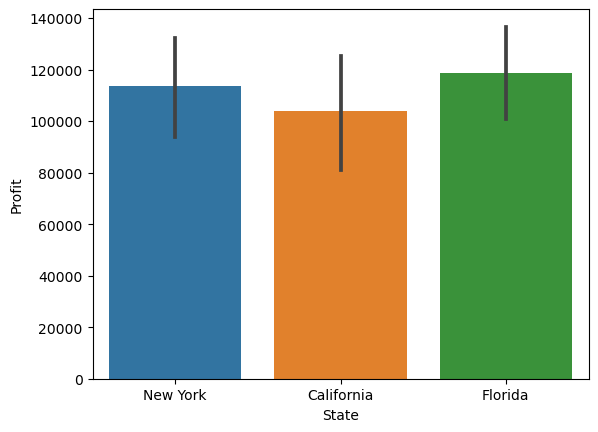

In [9]:
sns.barplot(data=df,y="Profit",x="State")

* how is the correlation between coloums?

<AxesSubplot:>

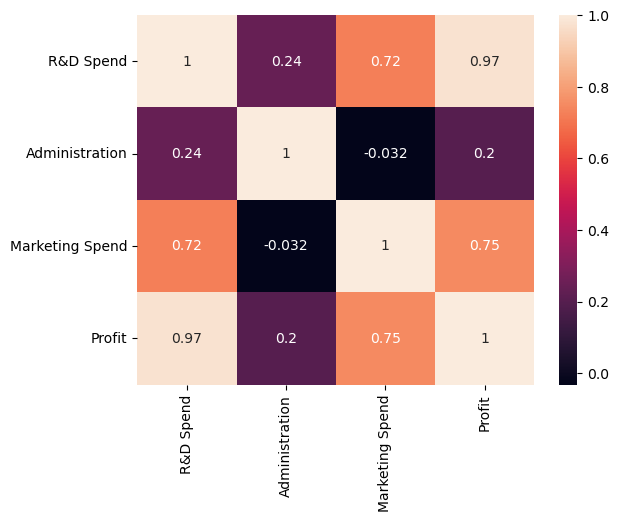

In [10]:
sns.heatmap(df.corr(), annot=True)

## Feature Engineering
In the feature engineering stage we do several things, such as:

* Drop Multicollinear Column

In [11]:
# drop Marketing Spend Column
df.drop(['Marketing Spend'], axis = 1,inplace=True)

* Scaling Data (ex : Standarization or Normalization)

In [12]:
# Scaling R&D Spend and Administration with MinMaxScaler
scaler = MinMaxScaler()
df[["R&D Spend"]] = scaler.fit_transform(df[["R&D Spend"]])
df[["Administration"]] = scaler.fit_transform(df[["Administration"]])

* Change data categorical or ordinal values into a numbers (ex : one hot encoding)

In [13]:
# change State Column to one hot encoding
state_enc = pd.get_dummies(df['State'], prefix='State', drop_first = False)
df = df.drop(['State'], axis = 1)
df = pd.concat([df, state_enc], axis = 1)

In [14]:
# result
df.head()

,R&D Spend,Administration,Profit,State_California,State_Florida,State_New York
0,1.000000,0.651744,192261.83,0,0,1
1,0.983359,0.761972,191792.06,1,0,0
2,0.927985,0.379579,191050.39,0,1,0
3,0.873136,0.512998,182901.99,0,0,1
4,0.859438,0.305328,166187.94,0,1,0


## Preprosesing Modeling
Before entering the modeling stage, we enter the preprocessing stage first.<br>
At this stage we divide the dataset into train data and test data

* split train-test the data

In [15]:
X = df.drop(["Profit"], axis = 1)
y = df["Profit"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

## Modeling
In the modeling stage we do several things, such as:

* Choose the model ( ex : LinearRegression, ExtraTreesClassifier, Forecasting, Etc.)

In [17]:
regressor = LinearRegression()

* Train the model

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

* check feature importance

In [19]:
importance = regressor.coef_

In [20]:
for i,v in enumerate(importance):
    print("feature: %0d, score: %.5f"%(i,v))

feature: 0, score: 142190.07780
feature: 1, score: -12647.33795
feature: 2, score: -927.42521
feature: 3, score: 1287.23926
feature: 4, score: -359.81405


* Make predictions with trained models

In [21]:
y_pred = regressor.predict(X_test)

*  make a visualization of the result in barchart

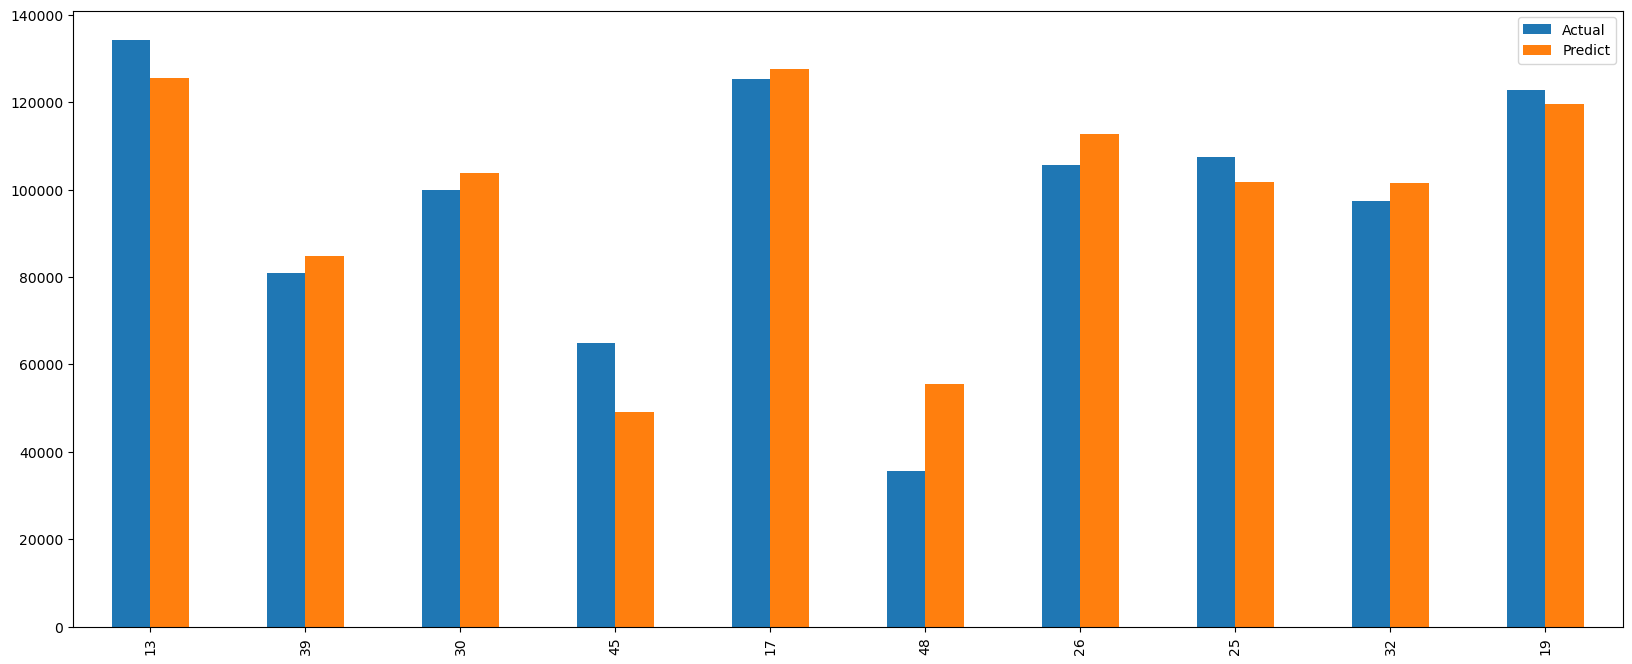

In [22]:
result = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
result.plot(kind="bar",figsize=(20,8))
plt.show()

## Evaluate Modeling
After doing the modeling stage such as choosing a model, training the model and making predictions with the model, then we need to evaluate the results of our model predictions so that we can improve our model to be better or more accurate.<br>
In the evaluate modeling stage we do several things, such as:

* calculate the error percentage with mean_absolute_percentage_error

In [23]:
mean_absolute_percentage_error(y_test, y_pred)

0.11586481190910256

## Re-Modeling after Evaluate
In the re-modeling stage we do several things to improve the model, such as:

* drop feature with negative values

In [24]:
# drop feature 1, 2, and 4
df.drop(['Administration', 'State_California', 'State_New York'], axis = 1,inplace=True)

* split train-test the data

In [25]:
X = df.drop(["Profit"], axis = 1)
y = df["Profit"]

In [26]:
X.head()

,R&D Spend,State_Florida
0,1.000000,0
1,0.983359,0
2,0.927985,1
3,0.873136,0
4,0.859438,1


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

* Choose the model ( ex : LinearRegression, ExtraTreesClassifier, Forecasting, Etc.)

In [28]:
regressor = LinearRegression()

* Train the model

In [29]:
regressor.fit(X_train,y_train)

LinearRegression()

* check feature importance

In [30]:
importance = regressor.coef_

In [31]:
for i,v in enumerate(importance):
    print("feature: %0d, score: %.5f"%(i,v))

feature: 0, score: 140888.98882
feature: 1, score: 2067.56885


* Make predictions with trained models

In [32]:
y_pred = regressor.predict(X_test)

*  make a visualization of the result in barchart

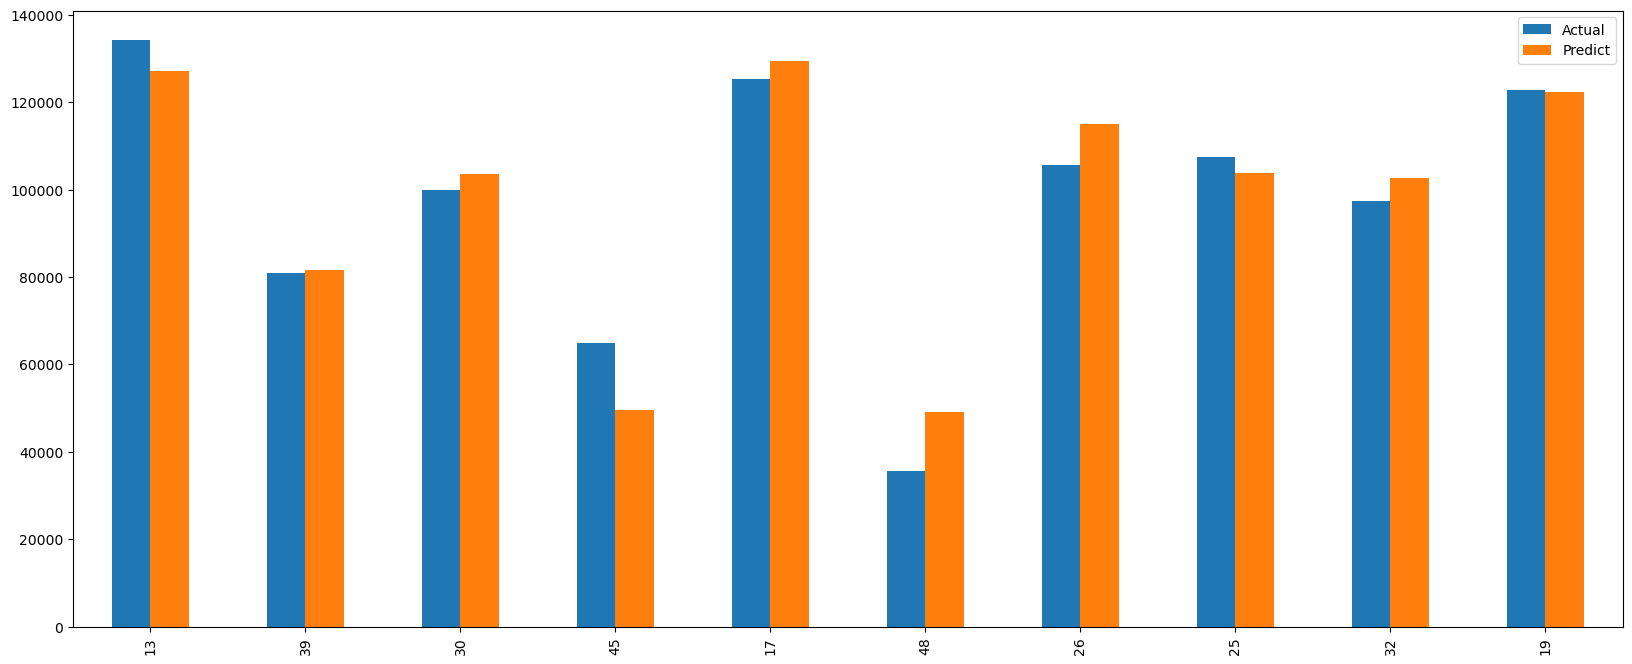

In [33]:
result = pd.DataFrame({"Actual":y_test,"Predict":y_pred})
result.plot(kind="bar",figsize=(20,8))
plt.show()

* calculate the error percentage with mean_absolute_percentage_error

In [34]:
mean_absolute_percentage_error(y_test, y_pred)

0.09237940361229964

the model prediction is better compare to before.

## Cross Validation
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. 

* Choose the model ( ex : LinearRegression, ExtraTreesClassifier, Forecasting, Etc.)

In [35]:
regressor = LinearRegression()

* Check the model scores with Cross Validation

In [36]:
scores = cross_val_score(regressor,X_train,y_train,scoring="r2",cv=3)
scores

array([0.96052255, 0.97121584, 0.84760897])